In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from lsst.sims.photUtils import Sed, Bandpass
import os
import lsst.sims.skybrightness as sb

In [2]:
# load up the dark sky used in sys-eng
darksky = Sed()
darksky.readSED_flambda(os.path.join('/Users/yoachim/git_repos/syseng_throughputs',
                                             'siteProperties', 'darksky.dat'))

Text(0, 0.5, 'ergs/cm^s/s/nm')

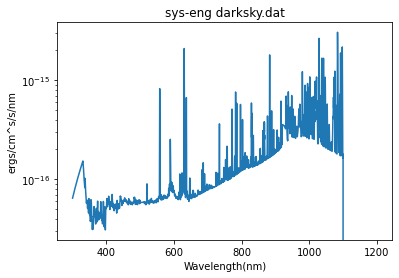

In [3]:
plt.semilogy(darksky.wavelen, darksky.flambda)
plt.title('sys-eng darksky.dat')
plt.xlabel('Wavelength(nm)')
plt.ylabel('ergs/cm^s/s/nm')

In [17]:
# Reminder, mergedSpec is upperAtm, lowerATM, and scatteredStar combined.
sm = sb.SkyModel(twilight=False, zodiacal=False, moon=False, scatteredStar=False,
                 airglow=True, mergedSpec=False, upperAtm=True, lowerAtm=True)
sm2 = sb.SkyModel(twilight=False, zodiacal=False, moon=False, scatteredStar=False,
                  airglow=True, mergedSpec=False, upperAtm=True, lowerAtm=True, mags=True)
# Pretty sure this should set it to zenith
sm.setRaDecMjd(0., 90., 58000, azAlt=True, degrees=True)
sm2.setRaDecMjd(0., 90., 58000, azAlt=True, degrees=True)

In [18]:
wave, spec = sm.returnWaveSpec()

Text(0, 0.5, 'erg/s/cm2/nm/arcsec$^2$')

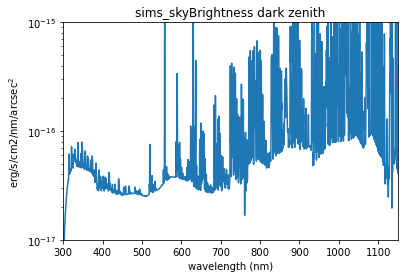

In [19]:
plt.semilogy(wave, spec[0,:])
plt.xlim(300, 1150)
plt.ylim(1e-17, 1e-15)
plt.title('sims_skyBrightness dark zenith')
plt.xlabel('wavelength (nm)')
plt.ylabel('erg/s/cm2/nm/arcsec$^2$')


In [20]:
# Read in an LSST r filter and compute the surface brightnesses
throughPath = os.getenv('LSST_THROUGHPUTS_BASELINE')
for filtname in 'ugrizy':
    bp = np.loadtxt(os.path.join(throughPath, 'total_%s.dat' % filtname),dtype=list(zip(['wave','trans'],[float]*2 )))
    lsst_r = Bandpass()
    lsst_r.setBandpass(bp['wave'], bp['trans'])

    mags = sm.returnMags(bandpasses={filtname: lsst_r})
    print('skymodel', mags)
    print('darksky', darksky.calcMag(lsst_r))
    

skymodel {'u': array([23.14607839])}
darksky 23.009802463861128
skymodel {'g': array([22.94687005])}
darksky 22.24201846992544
skymodel {'r': array([21.70935241])}
darksky 21.19448560410899
skymodel {'i': array([20.63029982])}
darksky 20.468487883374628
skymodel {'z': array([19.5793995])}
darksky 19.60438314328279
skymodel {'y': array([18.68739159])}
darksky 18.59044460725743
